## Imports

In [172]:
import itertools

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression


## Load Data

In [173]:
hitters_df = pd.read_csv('https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Hitters.csv')
hitters_df.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [174]:
hitters_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  322 non-null    object 
 1   AtBat       322 non-null    int64  
 2   Hits        322 non-null    int64  
 3   HmRun       322 non-null    int64  
 4   Runs        322 non-null    int64  
 5   RBI         322 non-null    int64  
 6   Walks       322 non-null    int64  
 7   Years       322 non-null    int64  
 8   CAtBat      322 non-null    int64  
 9   CHits       322 non-null    int64  
 10  CHmRun      322 non-null    int64  
 11  CRuns       322 non-null    int64  
 12  CRBI        322 non-null    int64  
 13  CWalks      322 non-null    int64  
 14  League      322 non-null    object 
 15  Division    322 non-null    object 
 16  PutOuts     322 non-null    int64  
 17  Assists     322 non-null    int64  
 18  Errors      322 non-null    int64  
 19  Salary      263 non-null    f

In [175]:
hitters_df.isna().sum()

Unnamed: 0     0
AtBat          0
Hits           0
HmRun          0
Runs           0
RBI            0
Walks          0
Years          0
CAtBat         0
CHits          0
CHmRun         0
CRuns          0
CRBI           0
CWalks         0
League         0
Division       0
PutOuts        0
Assists        0
Errors         0
Salary        59
NewLeague      0
dtype: int64

In [176]:
hitters_df = hitters_df.dropna()

In [177]:
quantitative_cols = hitters_df.select_dtypes(include=['number']).dtypes.index.tolist()
quantitative_cols

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors',
 'Salary']

In [178]:
qualitative_cols = hitters_df.select_dtypes(include=['category', 'object']).dtypes.index.tolist()
qualitative_cols

['Unnamed: 0', 'League', 'Division', 'NewLeague']

## Forward Selection

In [179]:
response = 'Salary'
predictors = list(set(quantitative_cols) - set([response]))

In [180]:
unused_features = predictors[:]
used_features = []
errors = []
model_stats = []

while unused_features:
    current_models = []
    for feature in unused_features:
        current_features = used_features + [feature]
        X, y = hitters_df[current_features], hitters_df[response]
        model = LinearRegression()
        model.fit(X, y)
        y_hat = model.predict(X)
        # number of rows
        n = X.shape[0]
        # number of columns
        k = len(model.coef_)
        # degrees of freedom
        dof = n - (k + 1)
        # rss
        rss = np.power(y - y_hat, 2).sum()
        # tss
        tss = np.power(y - y.mean(), 2).sum()
        # adjusterd R^2
        adj_r_2 = 1 - (rss/tss)*(n-1)/dof
        current_models.append((feature, adj_r_2))
    
    current_models = sorted(current_models, reverse=True, key=lambda tup: tup[1])
    best_model = current_models[0][0]
    best_error = current_models[0][1]
#     print(best_model)
#     break
    unused_features.remove(best_model)
    used_features.append(best_model)
    errors.append(best_error)
#     print(f'unused: {unused_features}, used: {used_features}')
    model_stats.append((len(used_features), used_features[:], best_error))
    print(used_features)
        
        


['CRBI']
['CRBI', 'Hits']
['CRBI', 'Hits', 'PutOuts']
['CRBI', 'Hits', 'PutOuts', 'AtBat']
['CRBI', 'Hits', 'PutOuts', 'AtBat', 'Walks']
['CRBI', 'Hits', 'PutOuts', 'AtBat', 'Walks', 'CWalks']
['CRBI', 'Hits', 'PutOuts', 'AtBat', 'Walks', 'CWalks', 'CRuns']
['CRBI', 'Hits', 'PutOuts', 'AtBat', 'Walks', 'CWalks', 'CRuns', 'CAtBat']
['CRBI', 'Hits', 'PutOuts', 'AtBat', 'Walks', 'CWalks', 'CRuns', 'CAtBat', 'Assists']
['CRBI', 'Hits', 'PutOuts', 'AtBat', 'Walks', 'CWalks', 'CRuns', 'CAtBat', 'Assists', 'Runs']
['CRBI', 'Hits', 'PutOuts', 'AtBat', 'Walks', 'CWalks', 'CRuns', 'CAtBat', 'Assists', 'Runs', 'Errors']
['CRBI', 'Hits', 'PutOuts', 'AtBat', 'Walks', 'CWalks', 'CRuns', 'CAtBat', 'Assists', 'Runs', 'Errors', 'HmRun']
['CRBI', 'Hits', 'PutOuts', 'AtBat', 'Walks', 'CWalks', 'CRuns', 'CAtBat', 'Assists', 'Runs', 'Errors', 'HmRun', 'CHits']
['CRBI', 'Hits', 'PutOuts', 'AtBat', 'Walks', 'CWalks', 'CRuns', 'CAtBat', 'Assists', 'Runs', 'Errors', 'HmRun', 'CHits', 'Years']
['CRBI', 'Hits', 

In [181]:
stats_df = pd.DataFrame(model_stats, columns=['cnt', 'columns', 'adj_r_2'])
stats_df

,cnt,columns,adj_r_2
0,1,[CRBI],0.318850
1,2,"[CRBI, Hits]",0.420802
2,3,"[CRBI, Hits, PutOuts]",0.445075
3,4,"[CRBI, Hits, PutOuts, AtBat]",0.462159
4,5,"[CRBI, Hits, PutOuts, AtBat, Walks]",0.480505
5,6,"[CRBI, Hits, PutOuts, AtBat, Walks, CWalks]",0.481896
6,7,"[CRBI, Hits, PutOuts, AtBat, Walks, CWalks, CR...",0.496239
7,8,"[CRBI, Hits, PutOuts, AtBat, Walks, CWalks, CR...",0.503651
8,9,"[CRBI, Hits, PutOuts, AtBat, Walks, CWalks, CR...",0.508641
9,10,"[CRBI, Hits, PutOuts, AtBat, Walks, CWalks, CR...",0.507753


In [182]:
best_idx = stats_df['adj_r_2'].idxmax()
best_idx

8

In [183]:
stats_df.loc[best_idx, 'cnt'], stats_df.loc[best_idx, 'adj_r_2']

(9, 0.5086408324706606)

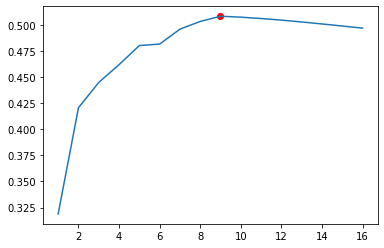

In [184]:
plt.plot(stats_df['cnt'], stats_df['adj_r_2'])
plt.scatter(x=stats_df.loc[best_idx, 'cnt'], y=stats_df.loc[best_idx, 'adj_r_2'], c='r')
plt.show()

## Backward Selection

In [235]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs


lr = LinearRegression()

X, y = hitters_df[predictors], hitters_df[response]


sfs1 = sfs(lr, 
           k_features=1, 
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=3)

sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.2s finished

[2022-04-28 20:37:12] Features: 15/1 -- score: 0.3989408593555345[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished

[2022-04-28 20:37:12] Features: 14/1 -- score: 0.4070500135253156[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished

[2022-04-28 20:37:13] Features: 13/1 -- score: 0.41510710151652147[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 

In [236]:
sfs1.subsets_

{16: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15),
  'cv_scores': array([0.56983207, 0.4385275 , 0.16191337]),
  'avg_score': 0.390090977801045,
  'feature_names': ('RBI',
   'Hits',
   'CWalks',
   'AtBat',
   'Errors',
   'Walks',
   'CHits',
   'CRuns',
   'Assists',
   'CRBI',
   'Years',
   'CHmRun',
   'HmRun',
   'CAtBat',
   'PutOuts',
   'Runs')},
 15: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15),
  'cv_scores': array([0.5807737 , 0.44007555, 0.17597332]),
  'avg_score': 0.3989408593555345,
  'feature_names': ('RBI',
   'Hits',
   'CWalks',
   'AtBat',
   'Errors',
   'Walks',
   'CHits',
   'CRuns',
   'Assists',
   'CRBI',
   'CHmRun',
   'HmRun',
   'CAtBat',
   'PutOuts',
   'Runs')},
 14: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 14, 15),
  'cv_scores': array([0.58399853, 0.43958722, 0.19756429]),
  'avg_score': 0.4070500135253156,
  'feature_names': ('RBI',
   'Hits',
   'CWalks',
   'AtBat',
   'Errors',
   'W

In [237]:
# best combination 
sfs1.k_score_, sfs1.k_feature_idx_

(0.28981755426924316, (7,))

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Number of Features', ylabel='Performance'>)

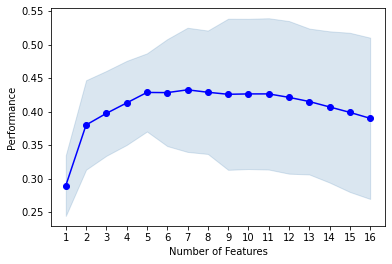

In [238]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

plot_sfs(sfs1.get_metric_dict(), kind='std_err')